<a href="https://colab.research.google.com/github/SamEpitech/CashManager/blob/master/dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data visualization et stat**

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
import pandas_profiling
import gc
import datetime
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Connect to drive 
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Read data from drive
df = pd.read_csv('/content/gdrive/My Drive/Mystery party T-ESP-800/IA/Datasets/Dataset_v0.csv')

In [ ]:
df

,user_id,genre,âge,localisation_user,lat_user,long_user,horaire,soiree_type,musique_type,budget_user,nb_user,transport_user,vendor_id,localisation_vendor,lat_vendor,long_vendor,type_vendor,Nom
0,1,F,25,"76 rue du commerce, 75015 PARIS",48.84519862899907,2.294095903066037,21.0,Dansant,Latino,30,2.0,Transport,1.0,"46 Rue du Faubourg Saint-Antoine, 75012 Paris",NaN,NaN,"Afterwork, dansant, atypique",Pachamama
1,2,F,28,"12 rue blomet, 75015 PARIS",48.84365999955674,2.30811070346621,NaN,Afterwork,Latino,35,3.0,Transport,2.0,"46 Rue du Faubourg Saint-Antoine, 75012 Paris",NaN,NaN,"Afterwork, dansant, atypique",Pachamama
2,3,H,30,"5 rue pleyel, 75012 PARIS",48.8401211047898,2.391211339573144,NaN,Atypique,Disco,40,2.0,Transport,3.0,"46 Rue du Faubourg Saint-Antoine, 75012 Paris",NaN,NaN,"Afterwork, dansant, atypique",Pachamama
3,4,F,25,"39 Boulevard Barbès, 75018 Paris",48.8877864,2.3493746,NaN,Dansant,Jazz,20,5.0,A pied,4.0,"9 Rue du Baigneur, 75018 Paris",48.89013671875,2.344573497772217,"Afterwork, Chill, Cocktail",Babilo
4,5,H,30,"18 rue taclet, 75020 PARIS",48.87155999918852,2.397945004533391,NaN,Cocktail,Jazz,25,2.0,Transport,5.0,"9 Rue du Baigneur, 75018 Paris",48.89013671875,2.344573497772217,"Afterwork, Chill, Cocktail",Babilo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,335,M,20,"48,8624696","2,353234743","19 Rue Rambuteau, 75004 Paris, France",18.0,Chill,Un peu de tout,42,5.0,Taxi/Uber,NaN,"184 Rue Saint-Jacques, 75005 Paris","48,8462801","2,3429164",NaN,WOS Bar
335,336,F,27,"48,8581887","2,350394616","5 Rue Saint-Bon, 75004 Paris, France",19.0,Afterwork,Un peu de tout,45,3.0,Taxi/Uber,NaN,"184 Rue Saint-Jacques, 75005 Paris","48,8462801","2,3429164",NaN,WOS Bar
336,337,F,19,"48,8479892","2,346353142","6 Rue d'Écosse, 75005 Paris, France",17.0,Atypique,Electro,14,1.0,Transports en commun,NaN,"89 Rue Amelot, 75011 Paris","48,8604488","2,3678318",NaN,Zero Zero
337,338,F,28,"48,8591178","2,352368251","16 Rue du Renard, 75004 Paris, France",22.0,Afterwork,Electro,9,7.0,Taxi/Uber,NaN,"89 Rue Amelot, 75011 Paris","48,8604488","2,3678318",NaN,Zero Zero


In [ ]:
df.describe()

,user_id,âge,horaire,budget_user,nb_user,vendor_id
count,339.000000,339.000000,231.000000,339.000000,338.000000,109.000000
mean,170.000000,27.905605,19.601732,55.159292,3.242604,55.000000
std,98.005102,5.195862,2.595447,34.570201,2.022211,31.609598
min,1.000000,18.000000,16.000000,2.000000,0.000000,1.000000
25%,85.500000,24.000000,17.000000,30.000000,2.000000,28.000000
50%,170.000000,29.000000,19.000000,45.000000,3.000000,55.000000
75%,254.500000,32.000000,22.000000,80.000000,5.000000,82.000000
max,339.000000,38.000000,24.000000,147.000000,7.000000,109.000000


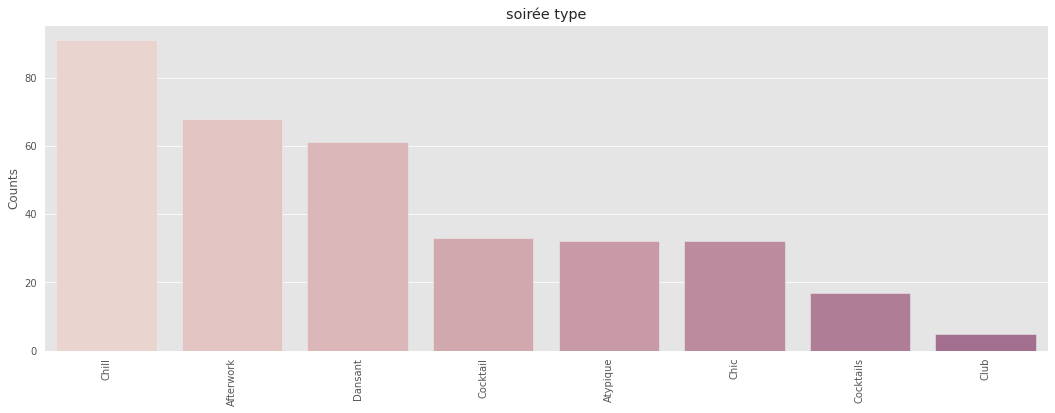

In [ ]:
#Plot type de soirées
soiree_counts = df['soiree_type'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(soiree_counts.index, soiree_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("soirée type");
plt.xticks(rotation=90);

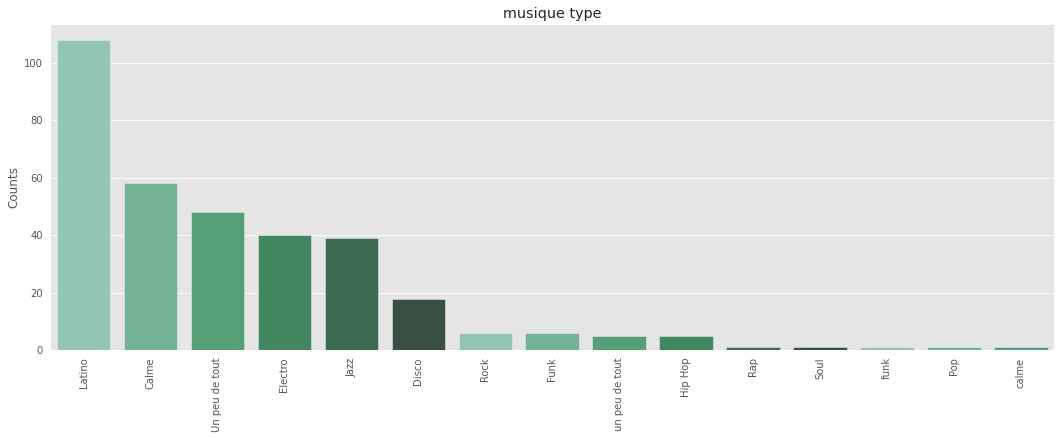

In [ ]:
#Plot type musique
music_counts = df['musique_type'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(music_counts.index, music_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("musique type");
plt.xticks(rotation=90);

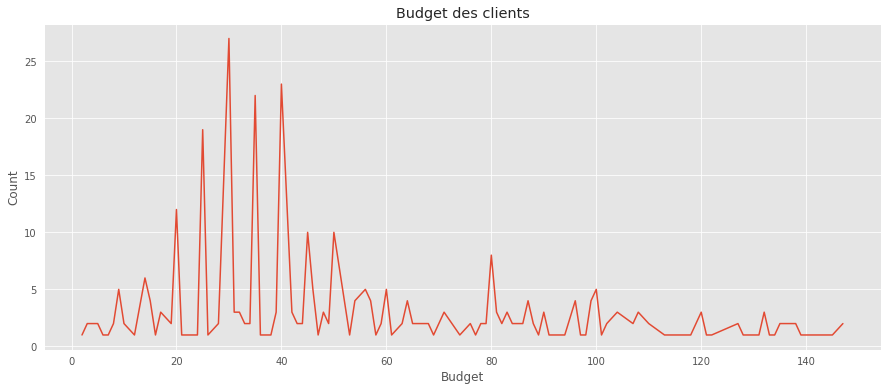

In [ ]:
#Plot budget client
orders=df.groupby(by=['budget_user'],as_index=False)['user_id'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.budget_user,orders.user_id);
plt.xlabel('Budget')
plt.ylabel('Count')
plt.title("Budget des clients")
plt.ioff()

In [ ]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [ ]:
df2 = df[categorical_cols]
df2

,genre,localisation_user,lat_user,long_user,soiree_type,musique_type,transport_user,localisation_vendor,lat_vendor,long_vendor,type_vendor,Nom
0,F,"76 rue du commerce, 75015 PARIS",48.84519862899907,2.294095903066037,Dansant,Latino,Transport,"46 Rue du Faubourg Saint-Antoine, 75012 Paris",NaN,NaN,"Afterwork, dansant, atypique",Pachamama
1,F,"12 rue blomet, 75015 PARIS",48.84365999955674,2.30811070346621,Afterwork,Latino,Transport,"46 Rue du Faubourg Saint-Antoine, 75012 Paris",NaN,NaN,"Afterwork, dansant, atypique",Pachamama
2,H,"5 rue pleyel, 75012 PARIS",48.8401211047898,2.391211339573144,Atypique,Disco,Transport,"46 Rue du Faubourg Saint-Antoine, 75012 Paris",NaN,NaN,"Afterwork, dansant, atypique",Pachamama
3,F,"39 Boulevard Barbès, 75018 Paris",48.8877864,2.3493746,Dansant,Jazz,A pied,"9 Rue du Baigneur, 75018 Paris",48.89013671875,2.344573497772217,"Afterwork, Chill, Cocktail",Babilo
4,H,"18 rue taclet, 75020 PARIS",48.87155999918852,2.397945004533391,Cocktail,Jazz,Transport,"9 Rue du Baigneur, 75018 Paris",48.89013671875,2.344573497772217,"Afterwork, Chill, Cocktail",Babilo
...,...,...,...,...,...,...,...,...,...,...,...,...
334,M,"48,8624696","2,353234743","19 Rue Rambuteau, 75004 Paris, France",Chill,Un peu de tout,Taxi/Uber,"184 Rue Saint-Jacques, 75005 Paris","48,8462801","2,3429164",NaN,WOS Bar
335,F,"48,8581887","2,350394616","5 Rue Saint-Bon, 75004 Paris, France",Afterwork,Un peu de tout,Taxi/Uber,"184 Rue Saint-Jacques, 75005 Paris","48,8462801","2,3429164",NaN,WOS Bar
336,F,"48,8479892","2,346353142","6 Rue d'Écosse, 75005 Paris, France",Atypique,Electro,Transports en commun,"89 Rue Amelot, 75011 Paris","48,8604488","2,3678318",NaN,Zero Zero
337,F,"48,8591178","2,352368251","16 Rue du Renard, 75004 Paris, France",Afterwork,Electro,Taxi/Uber,"89 Rue Amelot, 75011 Paris","48,8604488","2,3678318",NaN,Zero Zero
